In [1]:
import networkx as nx
import matplotlib.pyplot as plt

## **`Undirected-Unweighted-Graph`**

Weighted: False
Directed: False


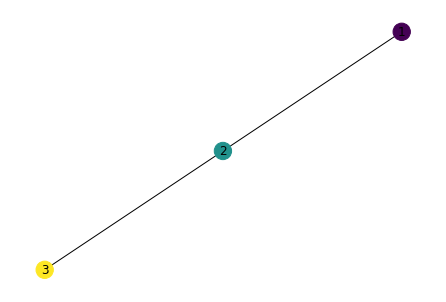

In [2]:
G = nx.Graph()
G.add_edge(1, 2)
G.add_edge(3, 2)
nx.draw(G, cmap = plt.get_cmap('viridis'), node_color = G, with_labels = True)
print('Weighted:',nx.is_weighted(G))
print('Directed:', nx.is_directed(G))

In [3]:
nx.to_numpy_matrix(G)

matrix([[0., 1., 0.],
        [1., 0., 1.],
        [0., 1., 0.]])

## **Undirected-Weighted-Graph**

Weighted: True
Directed: False


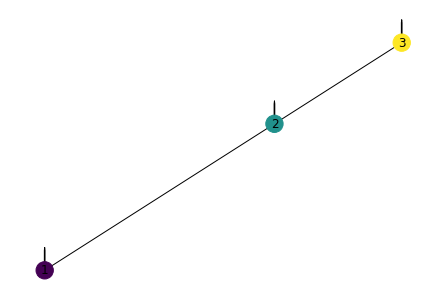

In [4]:
G = nx.Graph()
G.add_edge(1, 2, weight=1)
G.add_edge(3, 2, weight=5)
# Adding it later
G.add_edge(3,3, weight=3)
G.add_edge(2,2, weight=6)
G.add_edge(1,1, weight=9)
nx.draw(G, cmap=plt.get_cmap('viridis'), node_color=G, with_labels=True)
print('Weighted:',nx.is_weighted(G))
print('Directed:', nx.is_directed(G))

In [5]:
nx.to_numpy_matrix(G)

matrix([[9., 1., 0.],
        [1., 6., 5.],
        [0., 5., 3.]])

**Incidence Matrix**

In [6]:
I = nx.incidence_matrix(G)
print('data:',I.data)
print('\n')
print(I.todense())

data: [1. 1. 1. 1.]


[[1. 0. 0. 0. 0.]
 [1. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]]


**Adjency Matrix**

In [7]:
A = nx.adjacency_matrix(G)
print('data:',A.data)
print('\n')
print(A.todense())

data: [9 1 1 6 5 5 3]


[[9 1 0]
 [1 6 5]
 [0 5 3]]


**Laplacian Matrix**

In [8]:
# L= D-A
# D is Degree Matrix
# for Laplacian Matrix you can not use the directed graph

L = nx.laplacian_matrix(G)
print(L.data)
print('\n')
print(L.todense())

[ 1 -1 -1  6 -5 -5  5]


[[ 1 -1  0]
 [-1  6 -5]
 [ 0 -5  5]]


## **Directed-Weighted-Graph**

Weighted: True
Directed: True


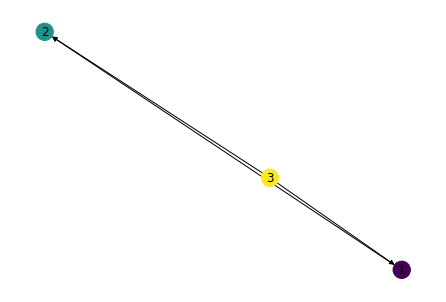

In [9]:
# nx.DiGraph() for Directed 
# nx.Graph() for Undirected
# weight=0 for unweighted


G = nx.DiGraph()
G.add_edge(1, 2, weight=1)
G.add_edge(3, 2, weight=5)
G.add_edge(3, 1, weight=10)
# Adding it later
#G.add_edge(3,3)
nx.draw(G, cmap=plt.get_cmap('viridis'), node_color=G, with_labels=True,)
print('Weighted:',nx.is_weighted(G))
print('Directed:', nx.is_directed(G))

In [10]:
I = nx.incidence_matrix(G)
print(I.data)
print('\n')
print(I.todense())

[1. 1. 1. 1. 1. 1.]


[[1. 0. 1.]
 [1. 1. 0.]
 [0. 1. 1.]]


In [11]:
A = nx.adjacency_matrix(G)
print(A.data)
print('\n')
print(A.todense())

[ 1 10  5]


[[ 0  1  0]
 [ 0  0  0]
 [10  5  0]]


# **Representing Graph**

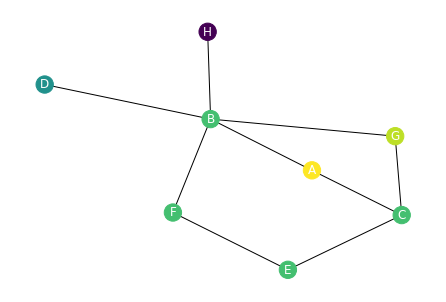

In [12]:
G = nx.Graph()
G.add_edges_from(
    [('A', 'B'), ('A', 'C'), ('D', 'B'), ('E', 'C'), ('E', 'F'),
     ('B', 'H'), ('B', 'G'), ('B', 'F'), ('C', 'G')])

val_map = {'A': 1.0,
           'D': 0.5,
           'F': 0.7,
           'G': 0.9,
           'H': 0.0}

values = [val_map.get(node, .7) for node in G.nodes()]

nx.draw(G, cmap=plt.get_cmap('viridis'), node_color=values, with_labels=True, font_color='white')
plt.show()

False
False


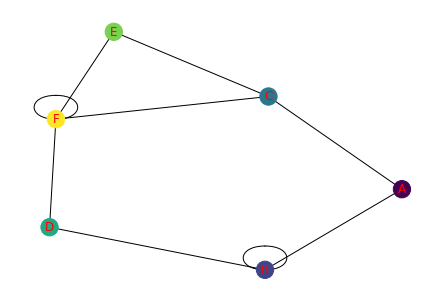

In [13]:
G = nx.Graph() 
G.add_edges_from(
    [('A', 'B'), ('A', 'C'), ('B', 'D'), ('C', 'E'), ('C', 'F'),
     ('E', 'F'), ('D', 'F'), ('B', 'B'), ('F', 'F')])

val_map = {'A': 1.0,
           'B': 2.0,
           'C': 3.0,
           'D': 4.0, 'E': 5.0, 'F': 6.0}

values = [val_map.get(node, 0.25) for node in G.nodes()]
nx.draw(G, cmap=plt.get_cmap('viridis'), with_labels=True, node_color=values, font_color='red')

print(nx.is_weighted(G))
print(nx.is_directed(G))

In [14]:
A = nx.adjacency_matrix(G)
print(A.todense())

[[0 1 1 0 0 0]
 [1 1 0 1 0 0]
 [1 0 0 0 1 1]
 [0 1 0 0 0 1]
 [0 0 1 0 0 1]
 [0 0 1 1 1 1]]


In [15]:
# Degree Matrix
G.degree()

DegreeView({'A': 2, 'B': 4, 'C': 3, 'D': 2, 'E': 2, 'F': 5})

In [16]:
# L = (A- D) where D is degree matrix
L = nx.laplacian_matrix(G)
print(L.todense())

[[ 2 -1 -1  0  0  0]
 [-1  2  0 -1  0  0]
 [-1  0  3  0 -1 -1]
 [ 0 -1  0  2  0 -1]
 [ 0  0 -1  0  2 -1]
 [ 0  0 -1 -1 -1  3]]


# **DEEP WALK**

In [17]:
import random
def get_randomwalk(graph_val, node, path_length):
    '''
    graph_val=> GRAPH
    node=> starting node
    '''

    
    random_walk = [node]
    
    for i in range(path_length-1):
        temp = list(graph_val.neighbors(node))
        temp = list(set(temp) - set(random_walk))    
        if len(temp) == 0:
            break

        random_node = random.choice(temp)
        random_walk.append(random_node)
        node = random_node
        
    return random_walk

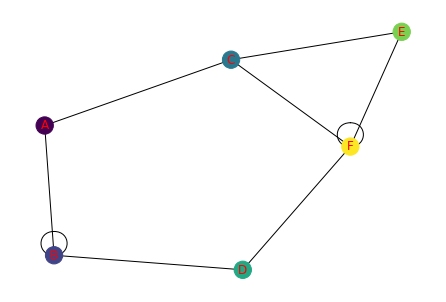

In [18]:
nx.draw(G, cmap=plt.get_cmap('viridis'), with_labels=True, node_color=values, font_color='red')

In [19]:
get_randomwalk(G, 'E', 5)

['E', 'C', 'A', 'B', 'D']

In [20]:
get_randomwalk(G, 'E', 5)

['E', 'F', 'C', 'A', 'B']

In [21]:
from tqdm import tqdm
# get list of all nodes from the graph
all_nodes = list(G.nodes())
print(all_nodes)

random_walks = []
for n in tqdm(all_nodes):
    for i in range(10):
        random_walks.append(get_randomwalk(G, n, i))

print(random_walks)
# count of sequences
len(random_walks)

['A', 'B', 'C', 'D', 'E', 'F']


100%|██████████| 6/6 [00:00<00:00, 6877.79it/s]

[['A'], ['A'], ['A', 'C'], ['A', 'C', 'F'], ['A', 'B', 'D', 'F'], ['A', 'C', 'E', 'F', 'D'], ['A', 'B', 'D', 'F', 'E', 'C'], ['A', 'B', 'D', 'F', 'E', 'C'], ['A', 'B', 'D', 'F', 'E', 'C'], ['A', 'B', 'D', 'F', 'C', 'E'], ['B'], ['B'], ['B', 'A'], ['B', 'D', 'F'], ['B', 'D', 'F', 'E'], ['B', 'D', 'F', 'E', 'C'], ['B', 'A', 'C', 'E', 'F', 'D'], ['B', 'A', 'C', 'E', 'F', 'D'], ['B', 'D', 'F', 'C', 'A'], ['B', 'D', 'F', 'E', 'C', 'A'], ['C'], ['C'], ['C', 'E'], ['C', 'A', 'B'], ['C', 'F', 'E'], ['C', 'F', 'D', 'B', 'A'], ['C', 'F', 'E'], ['C', 'E', 'F', 'D', 'B', 'A'], ['C', 'E', 'F', 'D', 'B', 'A'], ['C', 'F', 'D', 'B', 'A'], ['D'], ['D'], ['D', 'B'], ['D', 'F', 'C'], ['D', 'B', 'A', 'C'], ['D', 'B', 'A', 'C', 'E'], ['D', 'B', 'A', 'C', 'E', 'F'], ['D', 'B', 'A', 'C', 'F', 'E'], ['D', 'B', 'A', 'C', 'E', 'F'], ['D', 'F', 'C', 'E'], ['E'], ['E'], ['E', 'C'], ['E', 'F', 'C'], ['E', 'F', 'C', 'A'], ['E', 'F', 'C', 'A', 'B'], ['E', 'C', 'F', 'D', 'B', 'A'], ['E', 'C', 'F', 'D', 'B', 'A'], ['E

60